In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import pylab
from matplotlib.ticker import MaxNLocator

import seaborn as sns
from scipy.stats import skew as skew

from timeit import default_timer as timer

In [3]:
RT = np.load('simulation/RT_arr_eta04.npy')
alpha_arr, beta_arr = np.arange(.5, 80, .5), np.arange(.1, 2.5, .01)

### computation

In [31]:
def heatmap_val(RT_arr):
    RT_skew, RT_mean = np.zeros((len(beta_arr), len(alpha_arr))), np.zeros((len(beta_arr), len(alpha_arr)))

    for column in range(len(alpha_arr)):
        for row in range(len(beta_arr)):
            cur_RT = RT_arr[row, column, :]
            if not np.all(np.isnan(cur_RT)):
                RT_skew[row, column], RT_mean[row, column] = skew(cur_RT, nan_policy='omit'), np.nanmean(cur_RT)

    return RT_skew, RT_mean

In [33]:
RT_skew, RT_mean= heatmap_val(RT)

In [37]:
len(RT_skew)

240

In [38]:
RT_mean.shape

(240, 159)

### plotting

In [105]:
def get_heatmap(RT_skew, RT_mean):
    color_palette = "mako_r" #sns.cubehelix_palette(as_cmap=True)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    skew_ax = sns.heatmap(RT_skew, ax=axes[0], cmap=color_palette)
    skew_ax.set_title("Skewness")
    mean_ax = sns.heatmap(RT_mean, ax=axes[1], cmap=color_palette)
    mean_ax.set_title("Mean")
    
    X = np.arange(0, RT_skew.shape[1])
    Y = np.arange(0, RT_skew.shape[0])
    skew_ax.contour(*np.meshgrid(X, Y), RT_skew, 5)#, colors=['red'])
    mean_ax.contour(*np.meshgrid(X, Y), RT_mean, 5)#, colors=['red'])

    for ax in axes.flat:
        ax.set_xlabel("α")
        ax.set_ylabel("β")

        ax.xaxis.set_ticks(np.linspace(0, RT_skew.shape[1], num=10))
        ax.xaxis.set_ticklabels(np.round(np.linspace(.5, 80, num=10), 1), rotation=0)
        ax.yaxis.set_ticks(np.linspace(0, RT_skew.shape[0], num=10))
        ax.yaxis.set_ticklabels(np.round(np.linspace(0.1, 2.5, num=10), 1))
        ax.invert_yaxis()

        font_size = 22
        params = {
                 'legend.fontsize': font_size,
                 'axes.labelsize': font_size,
                 'axes.titlesize': font_size,
                 'xtick.labelsize': font_size,
                 'ytick.labelsize': font_size
        }
        pylab.rcParams.update(params)

    plt.tight_layout()
    plt.savefig("graphs/heatmap.tiff", format="tiff")

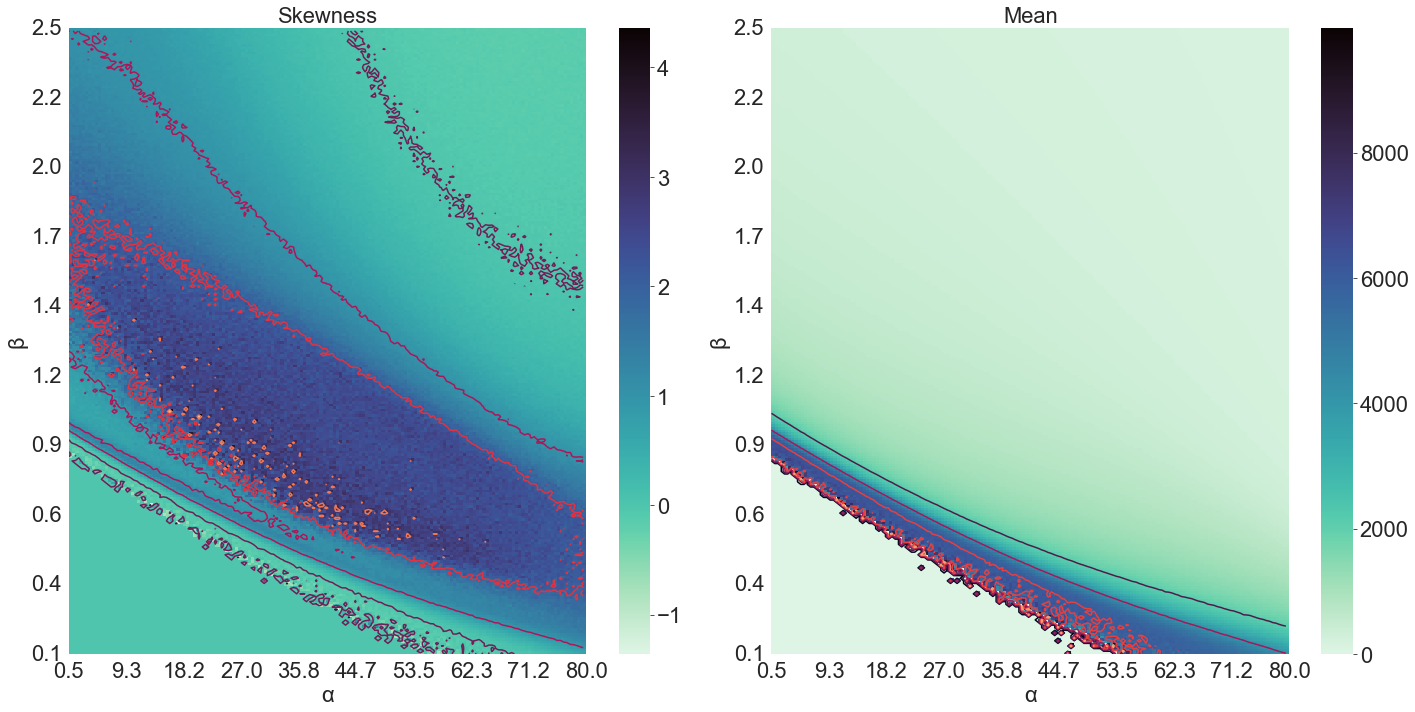

In [106]:
get_heatmap(RT_skew, RT_mean)